In [20]:
%matplotlib notebook
import pickle
import lzma
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
with lzma.open("25_nodes_res.xz","rb") as f:
    time_dict, res_dict = pickle.load(f)
    
def mesh_plot_results(meth='meth',fc_meth='fc'):
    thr = [0, 0.2, 0.4, 0.6, 0.8]
    mthr = [0.2,0.4,0.6,0.8]

    f1 = np.zeros((5,4))
    time = np.zeros((5,4))
    thr1 = np.array(mthr)
    thr2 = np.array(thr)
    thr1,thr2 = np.meshgrid(thr1,thr2)
    ind1 = 0
    for th1 in res_dict.keys():
        ind2 = 0
        for th2 in res_dict[th1].keys():
            f1[ind2,3-ind1] = res_dict[th1][th2][f'{c_meth}_{fc_meth}']/res_dict[th1][th2][f'{c_meth}']
            time[ind2,3-ind1] = time_dict[th1][th2][f'{c_meth}_{fc_meth}']/time_dict[th1][th2][f'{c_meth}']
            ind2+=1
        ind1+=1
    fig,ax = plt.subplots(subplot_kw={"projection": "3d"})
    surf = ax.plot_surface(thr1, thr2, f1, cmap=cm.coolwarm,
                        linewidth=0, antialiased=False)
    ax.set_zlim(0,2)
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.xlabel('Learning Threshold', fontsize=11)
    plt.ylabel('Probability Threshold', fontsize=11)
    plt.title('THP and FC Pruning Relative F1-Score')
    plt.show()

    fig,ax = plt.subplots(subplot_kw={"projection": "3d"})
    surf = ax.plot_surface(thr1, thr2, time, cmap=cm.coolwarm,
                        linewidth=0, antialiased=False)
    ax.set_zlim(0,2)
    fig.colorbar(surf, shrink=0.5, aspect=5)
    plt.xlabel('Learning Threshold', fontsize=11)
    plt.ylabel('Probability Threshold', fontsize=11)
    plt.title('THP and FC Pruning Relative Time Complexity')
    plt.show()

<IPython.core.display.Javascript object>


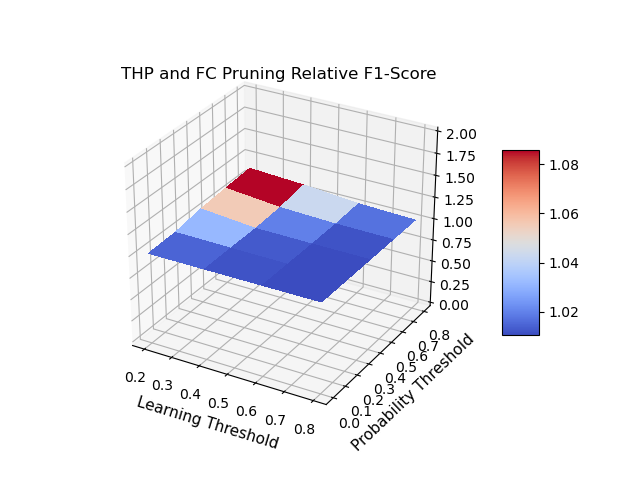

<IPython.core.display.Javascript object>


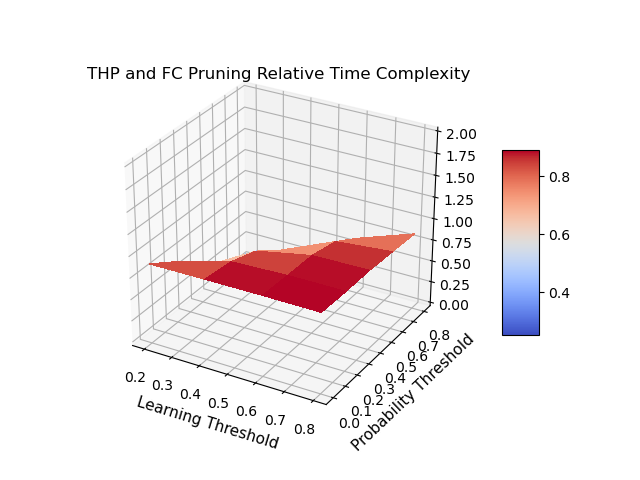

In [15]:
# 25 Nodes
# THP with Functional Connectivity Pruning
mesh_plot_results('thp','fc')

<IPython.core.display.Javascript object>


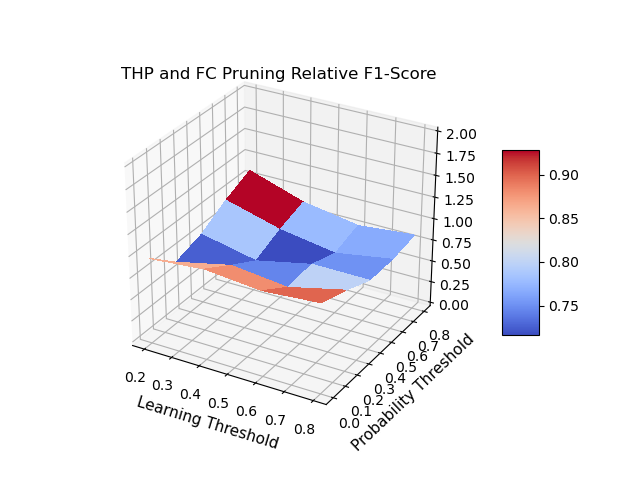

<IPython.core.display.Javascript object>


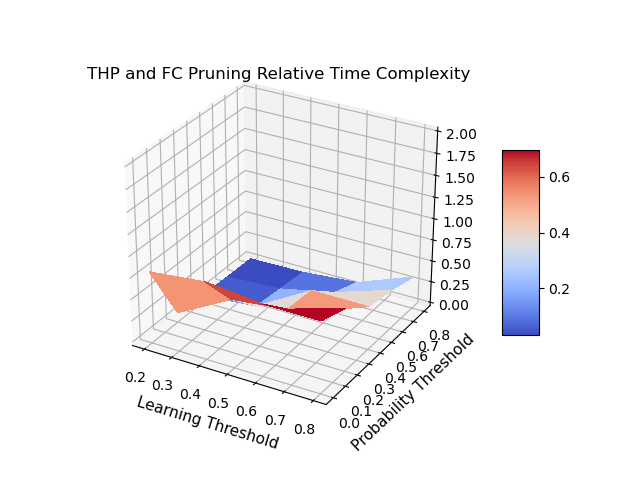

In [16]:
# THP with Functional Connectivity Pruning and Parallelisation
mesh_plot_results('thp','fc_par')

<IPython.core.display.Javascript object>


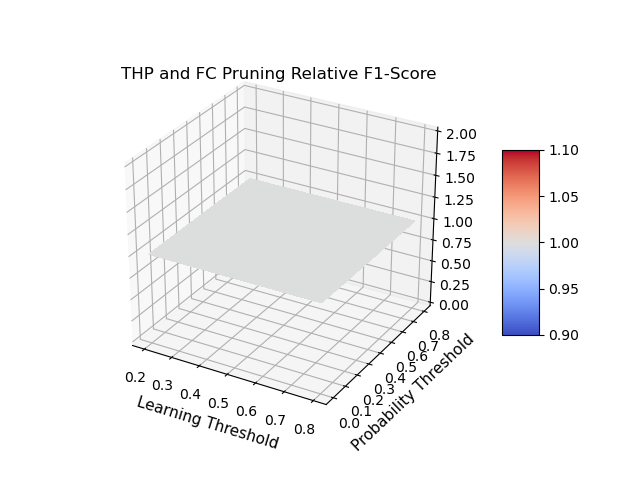

<IPython.core.display.Javascript object>


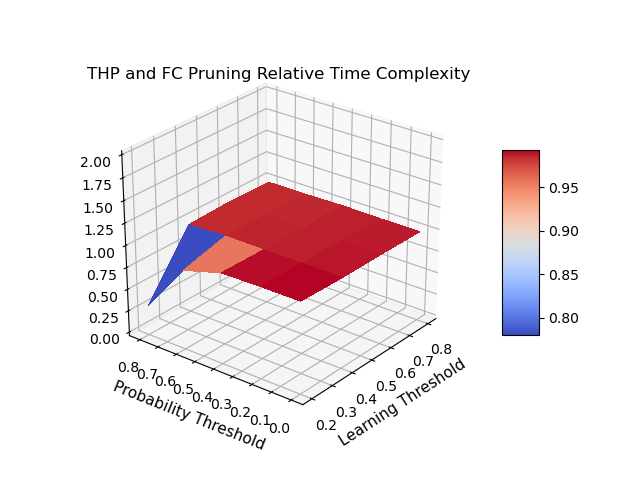

In [21]:
# PC with Functional Connectivity Pruning
mesh_plot_results('pc','fc')

<IPython.core.display.Javascript object>


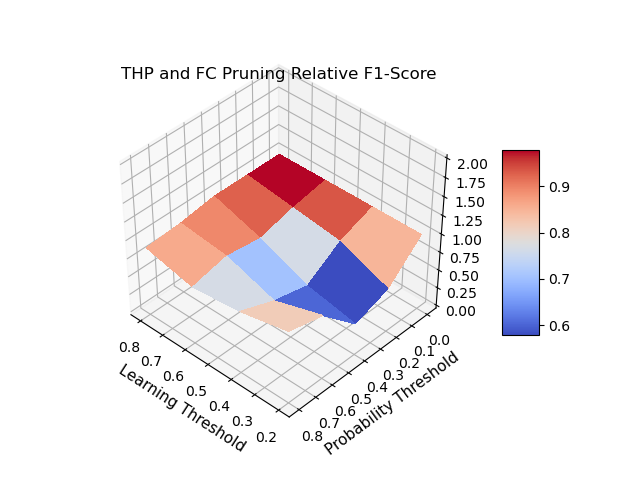

<IPython.core.display.Javascript object>


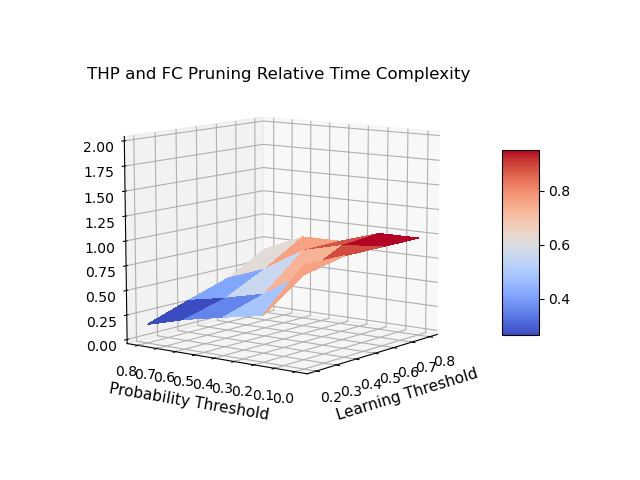

In [22]:
# PC with Functional Connectivity Pruning and Parallelisation
mesh_plot_results('pc','fc_par')